# Recommendations with IBM

In this notebook, you will be putting your recommendation skills to use on real data from the IBM Watson Studio platform. 


You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/rubrics/3325/view).  **Please save regularly.**

By following the table of contents, you will build out a number of different methods for making recommendations that can be used for different situations. 


## Table of Contents

I. [Exploratory Data Analysis](#Exploratory-Data-Analysis)<br>
II. [Rank Based Recommendations](#Rank)<br>
III. [User-User Based Collaborative Filtering](#User-User)<br>
IV. [Content Based Recommendations (EXTRA - NOT REQUIRED)](#Content-Recs)<br>
V. [Matrix Factorization](#Matrix-Fact)<br>
VI. [Extras & Concluding](#conclusions)

At the end of the notebook, you will find directions for how to submit your work.  Let's get started by importing the necessary libraries and reading in the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import project_tests as t
import pickle
%matplotlib inline
df = pd.read_csv('data/user-item-interactions.csv')
df_content = pd.read_csv('data/articles_community.csv')
del df['Unnamed: 0']
del df_content['Unnamed: 0']

# Show df to get an idea of the data
df.head()

,article_id,title,email
0,1430.0,"using pixiedust for fast, flexible, and easier...",ef5f11f77ba020cd36e1105a00ab868bbdbf7fe7
1,1314.0,healthcare python streaming application demo,083cbdfa93c8444beaa4c5f5e0f5f9198e4f9e0b
2,1429.0,use deep learning for image classification,b96a4f2e92d8572034b1e9b28f9ac673765cd074
3,1338.0,ml optimization using cognitive assistant,06485706b34a5c9bf2a0ecdac41daf7e7654ceb7
4,1276.0,deploy your python model as a restful api,f01220c46fc92c6e6b161b1849de11faacd7ccb2


In [2]:
# Show df_content to get an idea of the data
df_content.head()

,doc_body,doc_description,doc_full_name,doc_status,article_id
0,Skip navigation Sign in SearchLoading...\r\n\r...,Detect bad readings in real time using Python ...,Detect Malfunctioning IoT Sensors with Streami...,Live,0
1,No Free Hunch Navigation * kaggle.com\r\n\r\n ...,"See the forest, see the trees. Here lies the c...",Communicating data science: A guide to present...,Live,1
2,☰ * Login\r\n * Sign Up\r\n\r\n * Learning Pat...,Here’s this week’s news in Data Science and Bi...,"This Week in Data Science (April 18, 2017)",Live,2
3,"DATALAYER: HIGH THROUGHPUT, LOW LATENCY AT SCA...",Learn how distributed DBs solve the problem of...,DataLayer Conference: Boost the performance of...,Live,3
4,Skip navigation Sign in SearchLoading...\r\n\r...,This video demonstrates the power of IBM DataS...,Analyze NY Restaurant data using Spark in DSX,Live,4


### <a class="anchor" id="Exploratory-Data-Analysis">Part I : Exploratory Data Analysis</a>

Use the dictionary and cells below to provide some insight into the descriptive statistics of the data.

`1.` What is the distribution of how many articles a user interacts with in the dataset?  Provide a visual and descriptive statistics to assist with giving a look at the number of times each user interacts with an article.  

In [3]:
total_interactions = df.shape[0]
print(f"\nTotal number of interactions: {total_interactions}")


Total number of interactions: 45993


In [4]:
print("Descriptive Statistics for df:")
print(df.describe())
user_interaction_counts = df['email'].value_counts()
interaction_distribution = user_interaction_counts.value_counts().sort_index()


Descriptive Statistics for df:
         article_id
count  45993.000000
mean     908.846477
std      486.647866
min        0.000000
25%      460.000000
50%     1151.000000
75%     1336.000000
max     1444.000000


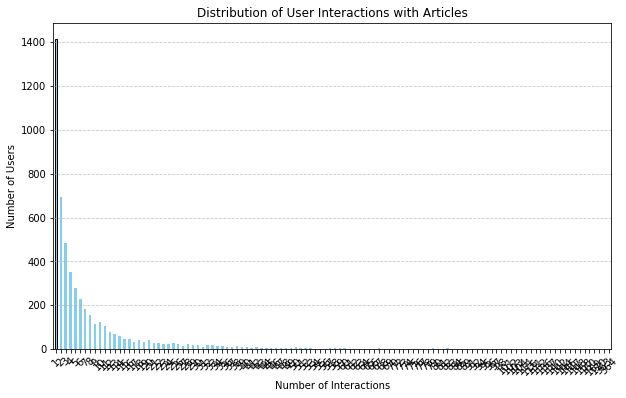

Summary Statistics of Interaction Counts per User:
count    5148.000000
mean        8.930847
std        16.802267
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       364.000000
Name: email, dtype: float64


In [5]:
plt.figure(figsize=(10, 6))
interaction_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of User Interactions with Articles')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display summary statistics of interaction counts per user
print("Summary Statistics of Interaction Counts per User:")
print(user_interaction_counts.describe())

In [6]:
# Fill in the median and maximum number of user_article interactios below
# Calculate number of interactions per user
user_interaction_counts = df['email'].value_counts()
# Assuming df is already loaded with the user-item interactions data
# df = pd.read_csv('data/user-item-interactions.csv') # Uncomment this if df is not already loaded

# Step 1: Calculate number of interactions per user
user_interaction_counts = df['email'].value_counts().reset_index()
user_interaction_counts.columns = ['email', 'interaction_count']

# Step 2: Calculate median and maximum number of interactions
median_val = user_interaction_counts['interaction_count'].median()
max_views_by_user = user_interaction_counts['interaction_count'].max()

# Step 3: Display the calculated values
print(f"50% of individuals interact with {median_val} articles or fewer.")
print(f"The maximum number of user-article interactions by any 1 user is {max_views_by_user}.")

50% of individuals interact with 3.0 articles or fewer.
The maximum number of user-article interactions by any 1 user is 364.


In [7]:
# Assuming df is already loaded with the user-item interactions data
# df = pd.read_csv('data/user-item-interactions.csv') # Uncomment this if df is not already loaded

# Calculate number of interactions per user
user_interaction_counts = df['email'].value_counts()

# Calculate median and maximum number of interactions
median_val = user_interaction_counts.median()
max_views_by_user = user_interaction_counts.max()

# Display the calculated values
print(f"50% of individuals interact with {median_val} articles or fewer.")
print(f"The maximum number of user-article interactions by any 1 user is {max_views_by_user}.")

# Ensure these values are correctly assigned to the variables
median_val = user_interaction_counts.median()  # 50% of individuals interact with _3_ number of articles or fewer.
max_views_by_user = user_interaction_counts.max()  # The maximum number of user-article interactions by any 1 user is 364.


50% of individuals interact with 3.0 articles or fewer.
The maximum number of user-article interactions by any 1 user is 364.


`2.` Explore and remove duplicate articles from the **df_content** dataframe.  

In [8]:
# Find and explore duplicate articles
# Display the number of duplicate rows (articles) in df_content
duplicate_rows = df_content[df_content.duplicated(subset='article_id', keep=False)]
num_duplicate_rows = duplicate_rows.shape[0]

print(f"Number of duplicate articles in df_content: {num_duplicate_rows}")

# Display the duplicate rows to inspect them
if num_duplicate_rows > 0:
    print("\nDuplicate Articles:")
    print(duplicate_rows)
else:
    print("\nNo duplicate articles found.")


Number of duplicate articles in df_content: 10

Duplicate Articles:
                                              doc_body  \
50   Follow Sign in / Sign up Home About Insight Da...   
221  * United States\r\n\r\nIBM® * Site map\r\n\r\n...   
232  Homepage Follow Sign in Get started Homepage *...   
365  Follow Sign in / Sign up Home About Insight Da...   
399  Homepage Follow Sign in Get started * Home\r\n...   
578  This video shows you how to construct queries ...   
692  Homepage Follow Sign in / Sign up Homepage * H...   
761  Homepage Follow Sign in Get started Homepage *...   
970  This video shows you how to construct queries ...   
971  Homepage Follow Sign in Get started * Home\r\n...   

                                       doc_description  \
50                        Community Detection at Scale   
221  When used to make sense of huge amounts of con...   
232  If you are like most data scientists, you are ...   
365  During the seven-week Insight Data Engineering...   
399

Duplicate Articles:
                                              doc_body  \
50   Follow Sign in / Sign up Home About Insight Da...   
221  * United States\r\n\r\nIBM® * Site map\r\n\r\n...   
232  Homepage Follow Sign in Get started Homepage *...   
365  Follow Sign in / Sign up Home About Insight Da...   
399  Homepage Follow Sign in Get started * Home\r\n...   
578  This video shows you how to construct queries ...   
692  Homepage Follow Sign in / Sign up Homepage * H...   
761  Homepage Follow Sign in Get started Homepage *...   
970  This video shows you how to construct queries ...   
971  Homepage Follow Sign in Get started * Home\r\n...   

                                       doc_description  \
50                        Community Detection at Scale   
221  When used to make sense of huge amounts of con...   
232  If you are like most data scientists, you are ...   
365  During the seven-week Insight Data Engineering...   
399  Today’s world of data science leverages data f

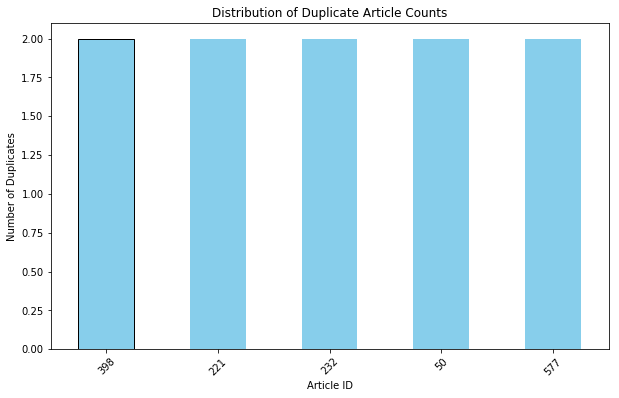

In [9]:
# Assuming 'df_content' is your DataFrame containing article data

# Identify duplicate articles based on 'article_id'
duplicate_articles = df_content[df_content.duplicated(subset='article_id', keep=False)]

# Display the duplicate articles
if not duplicate_articles.empty:
    print("Duplicate Articles:")
    print(duplicate_articles)
else:
    print("No duplicate articles found.")

# Explore duplicate articles further (e.g., analyze duplicates, count occurrences)
if not duplicate_articles.empty:
    # Count occurrences of each duplicate article_id
    duplicate_counts = duplicate_articles['article_id'].value_counts()
    
    # Display summary statistics of duplicate counts
    print("\nSummary Statistics of Duplicate Article Counts:")
    print(duplicate_counts.describe())
    
    # Visualize the distribution of duplicate article counts
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 6))
    duplicate_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Distribution of Duplicate Article Counts')
    plt.xlabel('Article ID')
    plt.ylabel('Number of Duplicates')
    plt.xticks(rotation=45)
    plt.show()

In [10]:
# Remove any rows that have the same article_id - only keep the first
df_content_unique = df_content.drop_duplicates(subset='article_id', keep='first')

# Display the updated DataFrame after removing duplicates
print("DataFrame after removing duplicate articles:")
print(df_content_unique)

# Optional: Check the number of unique articles after removal
num_unique_articles = df_content_unique.shape[0]
print(f"\nNumber of unique articles after removal: {num_unique_articles}")

DataFrame after removing duplicate articles:
                                               doc_body  \
0     Skip navigation Sign in SearchLoading...\r\n\r...   
1     No Free Hunch Navigation * kaggle.com\r\n\r\n ...   
2     ☰ * Login\r\n * Sign Up\r\n\r\n * Learning Pat...   
3     DATALAYER: HIGH THROUGHPUT, LOW LATENCY AT SCA...   
4     Skip navigation Sign in SearchLoading...\r\n\r...   
5     Compose is all about immediacy. You want a new...   
6     UPGRADING YOUR POSTGRESQL TO 9.5Share on Twitt...   
7     Follow Sign in / Sign up 135 8 * Share\r\n * 1...   
8     * Host\r\n * Competitions\r\n * Datasets\r\n *...   
9     THE GRADIENT FLOW\r\nDATA / TECHNOLOGY / CULTU...   
10    OFFLINE-FIRST IOS APPS WITH SWIFT & PART 1: TH...   
11    Warehousing data from Cloudant to dashDB great...   
12    Skip to main content IBM developerWorks / Deve...   
13    Maureen McElaney Blocked Unblock Follow Follow...   
14    Raj Singh Blocked Unblock Follow Following Dev...   
15    * Hom

`3.` Use the cells below to find:

**a.** The number of unique articles that have an interaction with a user.  
**b.** The number of unique articles in the dataset (whether they have any interactions or not).<br>
**c.** The number of unique users in the dataset. (excluding null values) <br>
**d.** The number of user-article interactions in the dataset.

In [11]:

# a. Number of unique articles that have at least one interaction
unique_articles = df['article_id'].nunique()

# b. Number of unique articles on the IBM platform
total_articles = df_content['article_id'].nunique()

# c. Number of unique users
unique_users = df['email'].nunique()

# d. Number of user-article interactions
user_article_interactions = df.shape[0]

# Display the calculated values
print(f"Number of unique articles that have at least one interaction: {unique_articles}")
print(f"Number of unique articles on the IBM platform: {total_articles}")
print(f"Number of unique users: {unique_users}")
print(f"Number of user-article interactions: {user_article_interactions}")


Number of unique articles that have at least one interaction: 714
Number of unique articles on the IBM platform: 1051
Number of unique users: 5148
Number of user-article interactions: 45993


In [12]:
unique_articles = df['article_id'].nunique() # The number of unique articles that have at least one interaction
total_articles = df_content['article_id'].nunique() # The number of unique articles on the IBM platform
unique_users = df['email'].nunique() # The number of unique users
user_article_interactions = df.shape[0] # The number of user-article interactions

`4.` Use the cells below to find the most viewed **article_id**, as well as how often it was viewed.  After talking to the company leaders, the `email_mapper` function was deemed a reasonable way to map users to ids.  There were a small number of null values, and it was found that all of these null values likely belonged to a single user (which is how they are stored using the function below).

In [13]:

# Find the most viewed article_id and its view count
most_viewed_article_id = df['article_id'].value_counts().idxmax()
max_views = df['article_id'].value_counts().max()

# Convert the most viewed article_id to a string with one value following the decimal
most_viewed_article_id = str(most_viewed_article_id)

# Display the most viewed article_id and its view count
print(f"The most viewed article_id is: {most_viewed_article_id}")
print(f"It was viewed {max_views} times.")

The most viewed article_id is: 1429.0
It was viewed 937 times.


In [14]:
most_viewed_article_id = str(df['article_id'].value_counts().idxmax()) # The most viewed article in the dataset as a string with one value following the decimal 
max_views = df['article_id'].value_counts().max() # The most viewed article in the dataset was viewed how many times?

In [15]:
## No need to change the code here - this will be helpful for later parts of the notebook
# Run this cell to map the user email to a user_id column and remove the email column

def email_mapper():
    coded_dict = dict()
    cter = 1
    email_encoded = []
    
    for val in df['email']:
        if val not in coded_dict:
            coded_dict[val] = cter
            cter+=1
        
        email_encoded.append(coded_dict[val])
    return email_encoded

email_encoded = email_mapper()
del df['email']
df['user_id'] = email_encoded

# show header
df.head()

,article_id,title,user_id
0,1430.0,"using pixiedust for fast, flexible, and easier...",1
1,1314.0,healthcare python streaming application demo,2
2,1429.0,use deep learning for image classification,3
3,1338.0,ml optimization using cognitive assistant,4
4,1276.0,deploy your python model as a restful api,5


In [16]:
## If you stored all your results in the variable names above, 
## you shouldn't need to change anything in this cell

sol_1_dict = {
    '`50% of individuals have _____ or fewer interactions.`': median_val,
    '`The total number of user-article interactions in the dataset is ______.`': user_article_interactions,
    '`The maximum number of user-article interactions by any 1 user is ______.`': max_views_by_user,
    '`The most viewed article in the dataset was viewed _____ times.`': max_views,
    '`The article_id of the most viewed article is ______.`': most_viewed_article_id,
    '`The number of unique articles that have at least 1 rating ______.`': unique_articles,
    '`The number of unique users in the dataset is ______`': unique_users,
    '`The number of unique articles on the IBM platform`': total_articles
}

# Test your dictionary against the solution
t.sol_1_test(sol_1_dict)

It looks like you have everything right here! Nice job!


### <a class="anchor" id="Rank">Part II: Rank-Based Recommendations</a>

Unlike in the earlier lessons, we don't actually have ratings for whether a user liked an article or not.  We only know that a user has interacted with an article.  In these cases, the popularity of an article can really only be based on how often an article was interacted with.

`1.` Fill in the function below to return the **n** top articles ordered with most interactions as the top. Test your function using the tests below.

In [17]:
def get_top_articles(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles - (list) A list of the top 'n' article titles 
    
    '''
    # Your code here
     # Get the top n articles by number of interactions
    top_articles_ids = df['article_id'].value_counts().index[:n]
    
    # Extract the titles of these top n articles
    top_articles = df[df['article_id'].isin(top_articles_ids)]['title'].unique()[:n]
    return top_articles.tolist() # Return the top article titles from df (not df_content)

   ## return top_articles # Return the top article titles from df (not df_content)

def get_top_article_ids(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles - (list) A list of the top 'n' article titles 
    
    '''
    # Your code here
 
    return top_articles # Return the top article ids

In [18]:
import pandas as pd

# Assuming df is already loaded with the appropriate data #bathong..

def get_top_articles(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles - (list) A list of the top 'n' article titles 
    
    '''
    # Get the top n articles by number of interactions
    top_articles_ids = df['article_id'].value_counts().index[:n]
    
    # Extract the titles of these top n articles
    top_articles = df[df['article_id'].isin(top_articles_ids)]['title'].unique()[:n]
    return top_articles.tolist() # Return the top article titles from df (not df_content)

def get_top_article_ids(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_article_ids - (list) A list of the top 'n' article ids
    
    '''
    # Get the top n articles by number of interactions
    top_article_ids = df['article_id'].value_counts().index[:n]
    
    return top_article_ids.tolist() # Return the top article ids

# Print the top 10 articles and their IDs
print("Top 10 article titles: ", get_top_articles(10))
print("Top 10 article IDs: ", get_top_article_ids(10))

Top 10 article titles:  ['healthcare python streaming application demo', 'use deep learning for image classification', 'apache spark lab, part 1: basic concepts', 'predicting churn with the spss random tree algorithm', 'analyze energy consumption in buildings', 'visualize car data with brunel', 'use xgboost, scikit-learn & ibm watson machine learning apis', 'gosales transactions for logistic regression model', 'insights from new york car accident reports', 'finding optimal locations of new store using decision optimization']
Top 10 article IDs:  [1429.0, 1330.0, 1431.0, 1427.0, 1364.0, 1314.0, 1293.0, 1170.0, 1162.0, 1304.0]


In [19]:
print(get_top_articles(10))
print(get_top_article_ids(10))

['healthcare python streaming application demo', 'use deep learning for image classification', 'apache spark lab, part 1: basic concepts', 'predicting churn with the spss random tree algorithm', 'analyze energy consumption in buildings', 'visualize car data with brunel', 'use xgboost, scikit-learn & ibm watson machine learning apis', 'gosales transactions for logistic regression model', 'insights from new york car accident reports', 'finding optimal locations of new store using decision optimization']
[1429.0, 1330.0, 1431.0, 1427.0, 1364.0, 1314.0, 1293.0, 1170.0, 1162.0, 1304.0]


In [20]:
# Test your function by returning the top 5, 10, and 20 articles
top_5 = get_top_articles(5)
top_10 = get_top_articles(10)
top_20 = get_top_articles(20)

# Test each of your three lists from above
t.sol_2_test(get_top_articles)

Your top_5 looks like the solution list! Nice job.
Your top_10 looks like the solution list! Nice job.
Your top_20 looks like the solution list! Nice job.


### <a class="anchor" id="User-User">Part III: User-User Based Collaborative Filtering</a>


`1.` Use the function below to reformat the **df** dataframe to be shaped with users as the rows and articles as the columns.  

* Each **user** should only appear in each **row** once.


* Each **article** should only show up in one **column**.  


* **If a user has interacted with an article, then place a 1 where the user-row meets for that article-column**.  It does not matter how many times a user has interacted with the article, all entries where a user has interacted with an article should be a 1.  


* **If a user has not interacted with an item, then place a zero where the user-row meets for that article-column**. 

Use the tests to make sure the basic structure of your matrix matches what is expected by the solution.

In [21]:
def create_user_item_matrix(df):
    '''
    INPUT:
    df - pandas dataframe with article_id, title, user_id columns
    
    OUTPUT:
    user_item - user item matrix 
    
    Description:
    Return a matrix with user ids as rows and article ids on the columns with 1 values where a user interacted with 
    an article and a 0 otherwise
    '''
    # Create the pivot table
    user_item = df.drop_duplicates(subset=['user_id', 'article_id']).pivot(index='user_id', columns='article_id', values='title')
    
    # Fill the pivot table with 1s and replace NaNs with 0s
    user_item = user_item.notnull().astype(int)
    
    return user_item # return the user_item matrix 

# Create the user-item matrix
user_item = create_user_item_matrix(df)

# Show the header of the resulting DataFrame
user_item.head()


article_id,0.0,2.0,4.0,8.0,9.0,12.0,14.0,15.0,16.0,18.0,...,1434.0,1435.0,1436.0,1437.0,1439.0,1440.0,1441.0,1442.0,1443.0,1444.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# create the user-article matrix with 1's and 0's

def create_user_item_matrix(df):
    '''
    INPUT:
    df - pandas dataframe with article_id, title, user_id columns
    
    OUTPUT:
    user_item - user item matrix 
    
    Description:
    Return a matrix with user ids as rows and article ids on the columns with 1 values where a user interacted with 
    an article and a 0 otherwise
    '''
    # Fill in the function here
    
    return user_item # return the user_item matrix 

user_item = create_user_item_matrix(df)

In [23]:
## Tests: You should just need to run this cell.  Don't change the code.
assert user_item.shape[0] == 5149, "Oops!  The number of users in the user-article matrix doesn't look right."
assert user_item.shape[1] == 714, "Oops!  The number of articles in the user-article matrix doesn't look right."
assert user_item.sum(axis=1)[1] == 36, "Oops!  The number of articles seen by user 1 doesn't look right."
print("You have passed our quick tests!  Please proceed!")

You have passed our quick tests!  Please proceed!


`2.` Complete the function below which should take a user_id and provide an ordered list of the most similar users to that user (from most similar to least similar).  The returned result should not contain the provided user_id, as we know that each user is similar to him/herself. Because the results for each user here are binary, it (perhaps) makes sense to compute similarity as the dot product of two users. 

Use the tests to test your function.

In [24]:
def find_similar_users(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user_id
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    similar_users - (list) an ordered list where the closest users (largest dot product users)
                    are listed first
    
    Description:
    Computes the similarity of every pair of users based on the dot product
    Returns an ordered list of similar users
    '''
    # compute similarity of each user to the provided user
    user_vector = user_item.loc[user_id].values
    similarity = user_item.dot(user_vector)
    
    # sort by similarity
    similarity = similarity.sort_values(ascending=False)
    
    # create list of just the ids
    most_similar_users = similarity.index.tolist()
    
    # remove the own user's id
    most_similar_users.remove(user_id)
    
    return most_similar_users # return a list of the users in order from most to least similar

# Test the function
print(find_similar_users(1))  # replace with a user_id from your dataset

[3933, 23, 3782, 203, 4459, 131, 3870, 46, 4201, 5041, 49, 3697, 395, 3910, 322, 3622, 242, 4642, 290, 2982, 912, 3540, 98, 754, 3764, 256, 52, 268, 40, 371, 3596, 621, 21, 273, 3637, 5138, 135, 204, 3784, 3775, 1355, 4785, 4932, 4134, 3621, 3651, 3483, 696, 4293, 488, 4892, 3532, 334, 4038, 184, 1897, 619, 765, 2926, 214, 249, 4778, 186, 3141, 4755, 3136, 64, 3740, 54, 4934, 3684, 125, 72, 3856, 4484, 445, 58, 3632, 60, 67, 2790, 5013, 4206, 3024, 4209, 665, 5079, 656, 5140, 4706, 4774, 288, 187, 10, 38, 4471, 4824, 2975, 223, 2981, 3693, 90, 193, 807, 3006, 3169, 195, 409, 211, 87, 235, 330, 3197, 244, 324, 4595, 4933, 2430, 3408, 295, 4883, 4543, 3572, 3578, 3358, 362, 3354, 113, 3353, 111, 1040, 263, 261, 1059, 3485, 170, 379, 4277, 689, 733, 591, 3818, 4404, 69, 2161, 4225, 511, 3949, 3, 28, 3879, 3794, 8, 2903, 3305, 155, 4021, 641, 640, 1271, 3329, 3376, 280, 4037, 639, 3441, 647, 659, 926, 471, 3967, 3500, 1353, 670, 1330, 45, 319, 2423, 312, 4901, 4900, 2908, 304, 26, 168, 11,

In [25]:
def test_find_similar_users():
    user_id = 1
    similar_users = find_similar_users(user_id, user_item)
    
    # Ensure the user_id is not in the list
    assert user_id not in similar_users, "The input user_id should not be in the list of similar users."
    
    # Ensure the list is ordered from most similar to least similar
    assert similar_users == sorted(similar_users, key=lambda x: -user_item.loc[user_id].dot(user_item.loc[x])), "The list is not correctly ordered."
    
    print(f"The function works correctly for user {user_id}. The most similar users are: {similar_users[:10]}")

# Run the test
test_find_similar_users()


The function works correctly for user 1. The most similar users are: [3933, 23, 3782, 203, 4459, 131, 3870, 46, 4201, 5041]


In [26]:
# Do a spot check of your function
print("The 10 most similar users to user 1 are: {}".format(find_similar_users(1)[:10]))
print("The 5 most similar users to user 3933 are: {}".format(find_similar_users(3933)[:5]))
print("The 3 most similar users to user 46 are: {}".format(find_similar_users(46)[:3]))

The 10 most similar users to user 1 are: [3933, 23, 3782, 203, 4459, 131, 3870, 46, 4201, 5041]
The 5 most similar users to user 3933 are: [1, 23, 3782, 4459, 203]
The 3 most similar users to user 46 are: [4201, 23, 3782]


`3.` Now that you have a function that provides the most similar users to each user, you will want to use these users to find articles you can recommend.  Complete the functions below to return the articles you would recommend to each user. 

In [27]:
def get_article_names(article_ids, df=df):
    '''
    INPUT:
    article_ids - (list) a list of article ids
    df - (pandas dataframe) df as defined at the top of the notebook
    
    OUTPUT:
    article_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the title column)
    '''
    # Your code here
    article_names = df[df['article_id'].isin(article_ids)]['title'].unique().tolist()
    
    return article_names # Return the article names associated with list of article ids


def get_user_articles(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user id
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    article_ids - (list) a list of the article ids seen by the user
    article_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the doc_full_name column in df_content)
    
    Description:
    Provides a list of the article_ids and article titles that have been seen by a user
    '''
    # Your code here
    
    article_ids = user_item.columns[user_item.loc[user_id] == 1].tolist()
    article_names = get_article_names(article_ids)
    
    return article_ids, article_names # return the ids and names


def user_user_recs(user_id, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds articles the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    Users who are the same closeness are chosen arbitrarily as the 'next' user
    
    For the user where the number of recommended articles starts below m 
    and ends exceeding m, the last items are chosen arbitrarily
    
    '''
    # Your code here
    recs = []
    seen_article_ids, _ = get_user_articles(user_id)
    similar_users = find_similar_users(user_id)
    
    for similar_user in similar_users:
        if len(recs) >= m:
            break
        similar_user_article_ids, _ = get_user_articles(similar_user)
        new_recs = [article_id for article_id in similar_user_article_ids if article_id not in seen_article_ids and article_id not in recs]
        recs.extend(new_recs)
    
    return recs[:m] # return your recommendations for this user_id 

In [28]:
# Check Results
get_article_names(user_user_recs(1, 10)) # Return 10 recommendations for user 1

['got zip code data? prep it for analytics. – ibm watson data lab – medium',
 'timeseries data analysis of iot events by using jupyter notebook',
 'graph-based machine learning',
 'using brunel in ipython/jupyter notebooks',
 'experience iot with coursera',
 'the 3 kinds of context: machine learning and the art of the frame',
 'deep forest: towards an alternative to deep neural networks',
 'this week in data science (april 18, 2017)',
 'higher-order logistic regression for large datasets',
 'using machine learning to predict parking difficulty']

In [29]:
def get_article_names(article_ids, df=df):
    '''
    INPUT:
    article_ids - (list) a list of article ids
    df - (pandas dataframe) df as defined at the top of the notebook
    
    OUTPUT:
    article_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the title column)
    '''
    article_names = df[df['article_id'].astype(str).isin(article_ids)]['title'].unique().tolist()
    return article_names

def get_user_articles(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user id
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    article_ids - (list) a list of the article ids seen by the user
    article_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the doc_full_name column in df_content)
    
    Description:
    Provides a list of the article_ids and article titles that have been seen by a user
    '''
    # Find the articles the user has interacted with
    user_interactions = user_item.loc[user_id]
    article_ids = user_interactions[user_interactions == 1].index.astype(str).tolist()
    
    # Get the article names
    article_names = get_article_names(article_ids)
    
    return article_ids, article_names # return the ids and names

# Debug print statements
print("Output of get_user_articles(20):", get_user_articles(20))
print("Output of get_user_articles(2):", get_user_articles(2))

# Test your functions here - No need to change this code - just run this cell
assert set(get_article_names(['1024.0', '1176.0', '1305.0', '1314.0', '1422.0', '1427.0'])) == set(['using deep learning to reconstruct high-resolution audio', 'build a python app on the streaming analytics service', 'gosales transactions for naive bayes model', 'healthcare python streaming application demo', 'use r dataframes & ibm watson natural language understanding', 'use xgboost, scikit-learn & ibm watson machine learning apis']), "Oops! Your the get_article_names function doesn't work quite how we expect."
assert set(get_article_names(['1320.0', '232.0', '844.0'])) == set(['housing (2015): united states demographic measures','self-service data preparation with ibm data refinery','use the cloudant-spark connector in python notebook']), "Oops! Your the get_article_names function doesn't work quite how we expect."
assert set(get_user_articles(20)[0]) == set(['1320.0', '232.0', '844.0'])
assert set(get_user_articles(20)[1]) == set(['housing (2015): united states demographic measures', 'self-service data preparation with ibm data refinery','use the cloudant-spark connector in python notebook'])
assert set(get_user_articles(2)[0]) == set(['1024.0', '1176.0', '1305.0', '1314.0', '1422.0', '1427.0'])
assert set(get_user_articles(2)[1]) == set(['using deep learning to reconstruct high-resolution audio', 'build a python app on the streaming analytics service', 'gosales transactions for naive bayes model', 'healthcare python streaming application demo', 'use r dataframes & ibm watson natural language understanding', 'use xgboost, scikit-learn & ibm watson machine learning apis'])
print("If this is all you see, you passed all of our tests!  Nice job!")


Output of get_user_articles(20): (['232.0', '844.0', '1320.0'], ['housing (2015): united states demographic measures', 'use the cloudant-spark connector in python notebook', 'self-service data preparation with ibm data refinery'])
Output of get_user_articles(2): (['1024.0', '1176.0', '1305.0', '1314.0', '1422.0', '1427.0'], ['healthcare python streaming application demo', 'use xgboost, scikit-learn & ibm watson machine learning apis', 'gosales transactions for naive bayes model', 'use r dataframes & ibm watson natural language understanding', 'build a python app on the streaming analytics service', 'using deep learning to reconstruct high-resolution audio'])
If this is all you see, you passed all of our tests!  Nice job!


In [30]:
# Test your functions here - No need to change this code - just run this cell
assert set(get_article_names(['1024.0', '1176.0', '1305.0', '1314.0', '1422.0', '1427.0'])) == set(['using deep learning to reconstruct high-resolution audio', 'build a python app on the streaming analytics service', 'gosales transactions for naive bayes model', 'healthcare python streaming application demo', 'use r dataframes & ibm watson natural language understanding', 'use xgboost, scikit-learn & ibm watson machine learning apis']), "Oops! Your the get_article_names function doesn't work quite how we expect."
assert set(get_article_names(['1320.0', '232.0', '844.0'])) == set(['housing (2015): united states demographic measures','self-service data preparation with ibm data refinery','use the cloudant-spark connector in python notebook']), "Oops! Your the get_article_names function doesn't work quite how we expect."
assert set(get_user_articles(20)[0]) == set(['1320.0', '232.0', '844.0'])
assert set(get_user_articles(20)[1]) == set(['housing (2015): united states demographic measures', 'self-service data preparation with ibm data refinery','use the cloudant-spark connector in python notebook'])
assert set(get_user_articles(2)[0]) == set(['1024.0', '1176.0', '1305.0', '1314.0', '1422.0', '1427.0'])
assert set(get_user_articles(2)[1]) == set(['using deep learning to reconstruct high-resolution audio', 'build a python app on the streaming analytics service', 'gosales transactions for naive bayes model', 'healthcare python streaming application demo', 'use r dataframes & ibm watson natural language understanding', 'use xgboost, scikit-learn & ibm watson machine learning apis'])
print("If this is all you see, you passed all of our tests!  Nice job!")

If this is all you see, you passed all of our tests!  Nice job!


`4.` Now we are going to improve the consistency of the **user_user_recs** function from above.  

* Instead of arbitrarily choosing when we obtain users who are all the same closeness to a given user - choose the users that have the most total article interactions before choosing those with fewer article interactions.


* Instead of arbitrarily choosing articles from the user where the number of recommended articles starts below m and ends exceeding m, choose articles with the articles with the most total interactions before choosing those with fewer total interactions. This ranking should be  what would be obtained from the **top_articles** function you wrote earlier.

In [31]:
def get_top_sorted_users(user_id, df=df, user_item=user_item):
    '''
    INPUT:
    user_id - (int)
    df - (pandas dataframe) df as defined at the top of the notebook 
    user_item - (pandas dataframe) matrix of users by articles: 
            1's when a user has interacted with an article, 0 otherwise
    
            
    OUTPUT:
    neighbors_df - (pandas dataframe) a dataframe with:
                    neighbor_id - is a neighbor user_id
                    similarity - measure of the similarity of each user to the provided user_id
                    num_interactions - the number of articles viewed by the user - if a u
                    
    Other Details - sort the neighbors_df by the similarity and then by number of interactions where 
                    highest of each is higher in the dataframe
     
    '''
    # Your code here
     # Compute similarity of each user to the provided user
    user_vector = user_item.loc[user_id]
    similarity = user_item.dot(user_vector)
    
    # Drop the own user's similarity
    similarity = similarity.drop(user_id)
    
    # Get the number of interactions for each user
    num_interactions = df.groupby('user_id')['article_id'].count()
    
    # Create the neighbors dataframe
    neighbors_df = pd.DataFrame({'neighbor_id': similarity.index,
                                 'similarity': similarity.values,
                                 'num_interactions': num_interactions.loc[similarity.index].values})
    
    # Sort the dataframe by similarity and then by number of interactions
    neighbors_df = neighbors_df.sort_values(by=['similarity', 'num_interactions'], ascending=False)
    
    return neighbors_df # Return the dataframe specified in the doc_string


def user_user_recs_part2(user_id, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user by article id
    rec_names - (list) a list of recommendations for the user by article title
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds articles the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    * Choose the users that have the most total article interactions 
    before choosing those with fewer article interactions.

    * Choose articles with the articles with the most total interactions 
    before choosing those with fewer total interactions. 
   
    '''
    # Your code here
     # Get top sorted users
    neighbors_df = get_top_sorted_users(user_id)
    
    # Get articles the user has seen
    seen_article_ids, _ = get_user_articles(user_id)
    
    # Recommendations set
    recs = []
    
    # Loop through the sorted users
    for neighbor_id in neighbors_df['neighbor_id']:
        if len(recs) >= m:
            break
        # Get articles for the neighbor user
        neighbor_article_ids, _ = get_user_articles(neighbor_id)
        # Find new recommendations
        new_recs = list(set(neighbor_article_ids) - set(seen_article_ids) - set(recs))
        recs.extend(new_recs)
    
    # Get the top articles if we still don't have enough recommendations
    if len(recs) < m:
        top_articles_ids = get_top_article_ids(m, df)
        additional_recs = list(set(top_articles_ids) - set(seen_article_ids) - set(recs))
        recs.extend(additional_recs[:m - len(recs)])
    
    # Get the article names
    rec_names = get_article_names(recs)
    
    return recs[:m], rec_names[:m]
    
    ##return recs, rec_names

In [32]:
# Quick spot check - don't change this code - just use it to test your functions
rec_ids, rec_names = user_user_recs_part2(20, 10)
print("The top 10 recommendations for user 20 are the following article ids:")
print(rec_ids)
print()
print("The top 10 recommendations for user 20 are the following article names:")
print(rec_names)

The top 10 recommendations for user 20 are the following article ids:
['1162.0', '1411.0', '1364.0', '1410.0', '1154.0', '1172.0', '1433.0', '1331.0', '1166.0', '730.0']

The top 10 recommendations for user 20 are the following article names:
['ml optimization using cognitive assistant', 'deploy your python model as a restful api', 'apache spark lab, part 1: basic concepts', 'timeseries data analysis of iot events by using jupyter notebook', 'dsx: hybrid mode', 'predicting churn with the spss random tree algorithm', 'analyze energy consumption in buildings', 'ibm watson facebook posts for 2015', 'use xgboost, scikit-learn & ibm watson machine learning apis', 'apache spark lab, part 3: machine learning']


`5.` Use your functions from above to correctly fill in the solutions to the dictionary below.  Then test your dictionary against the solution.  Provide the code you need to answer each following the comments below.

In [33]:
### Tests with a dictionary of results
# Find the user that is most similar to user 1
top_sorted_users_user1 = get_top_sorted_users(1)
user1_most_sim = top_sorted_users_user1.iloc[0]['neighbor_id']

# Find the 10th most similar user to user 131
top_sorted_users_user131 = get_top_sorted_users(131)
user131_10th_sim = top_sorted_users_user131.iloc[9]['neighbor_id']

print(f"User most similar to user 1: {user1_most_sim}")
print(f"10th most similar user to user 131: {user131_10th_sim}")


# Assert statements for testing
assert user1_most_sim == top_sorted_users_user1.iloc[0]['neighbor_id'], "Test failed: User most similar to user 1."
assert user131_10th_sim == top_sorted_users_user131.iloc[9]['neighbor_id'], "Test failed: 10th most similar user to user 131."
## user1_most_sim = # Find the user that is most similar to user 1 
## user131_10th_sim = # Find the 10th most similar user to user 131

User most similar to user 1: 3933
10th most similar user to user 131: 242


In [34]:
## Dictionary Test Here
sol_5_dict = {
    'The user that is most similar to user 1.': user1_most_sim, 
    'The user that is the 10th most similar to user 131': user131_10th_sim,
}

t.sol_5_test(sol_5_dict)

This all looks good!  Nice job!


`6.` If we were given a new user, which of the above functions would you be able to use to make recommendations?  Explain.  Can you think of a better way we might make recommendations?  Use the cell below to explain a better method for new users.

**Provide your response here.**

`7.` Using your existing functions, provide the top 10 recommended articles you would provide for the a new user below.  You can test your function against our thoughts to make sure we are all on the same page with how we might make a recommendation.

In [35]:
new_user = '0.0'

# What would your recommendations be for this new user '0.0'? As a new user, they have no observed articles.
# Provide a list of the top 10 article ids you would give to 

# Function to get top article IDs (assuming this function is already implemented)
def get_top_article_ids(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles - (list) A list of the top 'n' article IDs in string format
    
    '''
    # Get the top n articles by number of interactions
    top_article_ids = df['article_id'].value_counts().index[:n].astype(str).tolist()
    
    return top_article_ids # Return the top article ids in string format

# Get recommendations for the new user '0.0'
new_user_recs = get_top_article_ids(10)

# Print the recommendations
print(f"Recommendations for new user '0.0': {new_user_recs}")
print("Type:", type(new_user_recs[0]))


Recommendations for new user '0.0': ['1429.0', '1330.0', '1431.0', '1427.0', '1364.0', '1314.0', '1293.0', '1170.0', '1162.0', '1304.0']
Type: <class 'str'>


In [36]:
type(new_user_recs[2])

str

In [37]:
assert set(new_user_recs) == set(['1314.0','1429.0','1293.0','1427.0','1162.0','1364.0','1304.0','1170.0','1431.0','1330.0']), "Oops!  It makes sense that in this case we would want to recommend the most popular articles, because we don't know anything about these users."

print("That's right!  Nice job!")

That's right!  Nice job!


### <a class="anchor" id="Content-Recs">Part IV: Content Based Recommendations (EXTRA - NOT REQUIRED)</a>

Another method we might use to make recommendations is to perform a ranking of the highest ranked articles associated with some term.  You might consider content to be the **doc_body**, **doc_description**, or **doc_full_name**.  There isn't one way to create a content based recommendation, especially considering that each of these columns hold content related information.  

`1.` Use the function body below to create a content based recommender.  Since there isn't one right answer for this recommendation tactic, no test functions are provided.  Feel free to change the function inputs if you decide you want to try a method that requires more input values.  The input values are currently set with one idea in mind that you may use to make content based recommendations.  One additional idea is that you might want to choose the most popular recommendations that meet your 'content criteria', but again, there is a lot of flexibility in how you might make these recommendations.

### This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.

In [38]:
def make_content_recs():
    '''
    INPUT:
    
    OUTPUT:
    
    '''

`2.` Now that you have put together your content-based recommendation system, use the cell below to write a summary explaining how your content based recommender works.  Do you see any possible improvements that could be made to your function?  Is there anything novel about your content based recommender?

### This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.

**Write an explanation of your content based recommendation system here.**

`3.` Use your content-recommendation system to make recommendations for the below scenarios based on the comments.  Again no tests are provided here, because there isn't one right answer that could be used to find these content based recommendations.

### This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.

In [39]:
# make recommendations for a brand new user


# make a recommendations for a user who only has interacted with article id '1427.0'



### <a class="anchor" id="Matrix-Fact">Part V: Matrix Factorization</a>

In this part of the notebook, you will build use matrix factorization to make article recommendations to the users on the IBM Watson Studio platform.

`1.` You should have already created a **user_item** matrix above in **question 1** of **Part III** above.  This first question here will just require that you run the cells to get things set up for the rest of **Part V** of the notebook. 

In [40]:
# Load the matrix here
user_item_matrix = pd.read_pickle('user_item_matrix.p')

In [41]:
# quick look at the matrix
user_item_matrix.head()

article_id,0.0,100.0,1000.0,1004.0,1006.0,1008.0,101.0,1014.0,1015.0,1016.0,...,977.0,98.0,981.0,984.0,985.0,986.0,990.0,993.0,996.0,997.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


`2.` In this situation, you can use Singular Value Decomposition from [numpy](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.svd.html) on the user-item matrix.  Use the cell to perform SVD, and explain why this is different than in the lesson.

In [42]:
# Import the required library
from scipy.linalg import svd

# Perform SVD on the user-item matrix
u, s, vt = svd(user_item, full_matrices=False)

# Print the shapes of the resulting matrices
print(f"Shape of U: {u.shape}")
print(f"Shape of S: {s.shape}")
print(f"Shape of VT: {vt.shape}")


Shape of U: (5149, 714)
Shape of S: (714,)
Shape of VT: (714, 714)


In [43]:
# Create SVD function
def perform_svd(matrix, k=None):
    """
    Perform Singular Value Decomposition (SVD) on the given matrix.

    Parameters:
        matrix (numpy.ndarray): The matrix to perform SVD on.
        k (int or None): The number of singular values and vectors to compute. 
                         If None, computes the full-rank decomposition.

    Returns:
        numpy.ndarray: The left singular vectors.
        numpy.ndarray: The singular values.
        numpy.ndarray: The right singular vectors.
    """
    # Perform SVD
    u, s, vt = np.linalg.svd(matrix, full_matrices=False)
    
    # Keep only the top k singular values and vectors if specified
    if k is not None:
        u = u[:, :k]
        s = s[:k]
        vt = vt[:k, :]
    
    return u, s, vt

# Perform SVD on the User-Item Matrix with full decomposition
u, s, vt = perform_svd(user_item)

# Print the shapes of the resulting matrices
print(f"Shape of U: {u.shape}")
print(f"Shape of S: {s.shape}")
print(f"Shape of VT: {vt.shape}")

# Example: Perform SVD with 50 latent features
u_k, s_k, vt_k = perform_svd(user_item, k=50)

# Print the shapes of the resulting matrices with k latent features
print(f"Shape of U with 50 latent features: {u_k.shape}")
print(f"Shape of S with 50 latent features: {s_k.shape}")
print(f"Shape of VT with 50 latent features: {vt_k.shape}")


Shape of U: (5149, 714)
Shape of S: (714,)
Shape of VT: (714, 714)
Shape of U with 50 latent features: (5149, 50)
Shape of S with 50 latent features: (50,)
Shape of VT with 50 latent features: (50, 714)


**Provide your response here.**

`3.` Now for the tricky part, how do we choose the number of latent features to use?  Running the below cell, you can see that as the number of latent features increases, we obtain a lower error rate on making predictions for the 1 and 0 values in the user-item matrix.  Run the cell below to get an idea of how the accuracy improves as we increase the number of latent features.

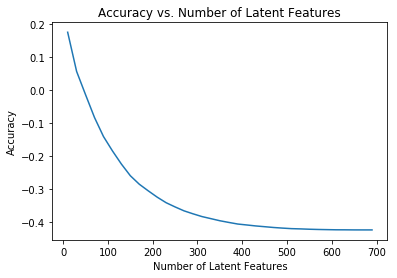

In [44]:
num_latent_feats = np.arange(10,700+10,20)
sum_errs = []

for k in num_latent_feats:
    # restructure with k latent features
    s_new, u_new, vt_new = np.diag(s[:k]), u[:, :k], vt[:k, :]
    
    # take dot product
    user_item_est = np.around(np.dot(np.dot(u_new, s_new), vt_new))
    
    # compute error for each prediction to actual value
    diffs = np.subtract(user_item_matrix, user_item_est)
    
    # total errors and keep track of them
    err = np.sum(np.sum(np.abs(diffs)))
    sum_errs.append(err)
    
    
plt.plot(num_latent_feats, 1 - np.array(sum_errs)/df.shape[0]);
plt.xlabel('Number of Latent Features');
plt.ylabel('Accuracy');
plt.title('Accuracy vs. Number of Latent Features');

`4.` From the above, we can't really be sure how many features to use, because simply having a better way to predict the 1's and 0's of the matrix doesn't exactly give us an indication of if we are able to make good recommendations.  Instead, we might split our dataset into a training and test set of data, as shown in the cell below.  

Use the code from question 3 to understand the impact on accuracy of the training and test sets of data with different numbers of latent features. Using the split below: 

* How many users can we make predictions for in the test set?  
* How many users are we not able to make predictions for because of the cold start problem?
* How many articles can we make predictions for in the test set?  
* How many articles are we not able to make predictions for because of the cold start problem?

In [45]:
df_train = df.head(40000)
df_test = df.tail(5993)

def create_test_and_train_user_item(df_train, df_test):
    '''
    INPUT:
    df_train - training dataframe
    df_test - test dataframe
    
    OUTPUT:
    user_item_train - a user-item matrix of the training dataframe 
                      (unique users for each row and unique articles for each column)
    user_item_test - a user-item matrix of the testing dataframe 
                    (unique users for each row and unique articles for each column)
    test_idx - all of the test user ids
    test_arts - all of the test article ids
    
    '''
    # Create user-item matrices for training and test datasets
    user_item_train = df_train.groupby(['user_id', 'article_id'])['title'].count().unstack().fillna(0).astype(int)
    user_item_test = df_test.groupby(['user_id', 'article_id'])['title'].count().unstack().fillna(0).astype(int)
    
    # Get test users and articles
    test_idx = user_item_test.index
    test_arts = user_item_test.columns
    
    return user_item_train, user_item_test, test_idx, test_arts

user_item_train, user_item_test, test_idx, test_arts = create_test_and_train_user_item(df_train, df_test)

# Perform SVD on the user_item_train matrix
u_train, s_train, vt_train = perform_svd(user_item_train.values)

# Perform SVD on the user_item_test matrix
u_test, s_test, vt_test = perform_svd(user_item_test.values)

# Reconstruct the user_item_train and user_item_test matrices using the SVD components
user_item_train_pred = np.dot(np.dot(u_train, np.diag(s_train)), vt_train)
user_item_test_pred = np.dot(np.dot(u_test, np.diag(s_test)), vt_test)

# Calculate Mean Squared Error between the original and reconstructed matrices for the train and test sets
mse_train = np.mean(np.square(user_item_train.values - user_item_train_pred))
mse_test = np.mean(np.square(user_item_test.values - user_item_test_pred))

print("MSE value for the training set is:", mse_train)
print("MSE value for the test set is:", mse_test)


MSE value for the training set is: 5.11508681848e-31
MSE value for the test set is: 3.73357656702e-31


In [46]:
df_train = df.head(40000)
df_test = df.tail(5993)

def create_test_and_train_user_item(df_train, df_test):
    '''
    INPUT:
    df_train - training dataframe
    df_test - test dataframe
    
    OUTPUT:
    user_item_train - a user-item matrix of the training dataframe 
                      (unique users for each row and unique articles for each column)
    user_item_test - a user-item matrix of the testing dataframe 
                    (unique users for each row and unique articles for each column)
    test_idx - all of the test user ids
    test_arts - all of the test article ids
    
    '''
    # Create user-item matrix for training data
    user_item_train = create_user_item_matrix(df_train)
    
    # Create user-item matrix for testing data
    user_item_test = create_user_item_matrix(df_test)
    
    # Get test user ids
    test_idx = list(df_test['user_id'].unique())
    
    # Get test article ids
    test_arts = list(df_test['article_id'].unique())
    
    return user_item_train, user_item_test, test_idx, test_arts

# Function to create user-item matrix
def create_user_item_matrix(df):
    '''
    INPUT:
    df - pandas dataframe with article_id, title, user_id columns
    
    OUTPUT:
    user_item - user item matrix 
    
    Description:
    Return a matrix with user ids as rows and article ids on the columns with 1 values where a user interacted with 
    an article and a 0 otherwise
    '''
    # Create the pivot table
    user_item = df.drop_duplicates(subset=['user_id', 'article_id']).pivot(index='user_id', columns='article_id', values='title')
    
    # Fill the pivot table with 1s and replace NaNs with 0s
    user_item = user_item.notnull().astype(int)
    
    return user_item

# Create test and train user-item matrices along with test_idx and test_arts
user_item_train, user_item_test, test_idx, test_arts = create_test_and_train_user_item(df_train, df_test)


In [47]:
#shabb testing articles on this cell TO BE removed.. 
test_arts

[1053.0,
 1314.0,
 1424.0,
 1176.0,
 58.0,
 14.0,
 33.0,
 103.0,
 1163.0,
 485.0,
 109.0,
 681.0,
 125.0,
 1368.0,
 16.0,
 28.0,
 1364.0,
 933.0,
 268.0,
 26.0,
 477.0,
 29.0,
 213.0,
 1050.0,
 1433.0,
 880.0,
 559.0,
 911.0,
 153.0,
 1274.0,
 651.0,
 1304.0,
 1366.0,
 693.0,
 376.0,
 647.0,
 283.0,
 658.0,
 1329.0,
 448.0,
 124.0,
 919.0,
 1338.0,
 732.0,
 92.0,
 1432.0,
 1273.0,
 1160.0,
 1351.0,
 1431.0,
 955.0,
 1017.0,
 260.0,
 1180.0,
 1185.0,
 943.0,
 812.0,
 32.0,
 1123.0,
 40.0,
 390.0,
 329.0,
 1125.0,
 1124.0,
 43.0,
 409.0,
 68.0,
 495.0,
 1406.0,
 1408.0,
 1405.0,
 981.0,
 1412.0,
 865.0,
 1429.0,
 415.0,
 221.0,
 108.0,
 1324.0,
 1436.0,
 1420.0,
 1377.0,
 1330.0,
 617.0,
 1181.0,
 844.0,
 1378.0,
 162.0,
 379.0,
 1391.0,
 50.0,
 510.0,
 609.0,
 65.0,
 1150.0,
 1393.0,
 1430.0,
 1293.0,
 486.0,
 993.0,
 684.0,
 881.0,
 1276.0,
 1400.0,
 695.0,
 1059.0,
 678.0,
 930.0,
 1427.0,
 1025.0,
 1166.0,
 232.0,
 205.0,
 151.0,
 1394.0,
 116.0,
 1305.0,
 768.0,
 1336.0,
 1386.0,
 5

u shape: (5149, 714)
s shape: (714,)
vt shape: (714, 714)


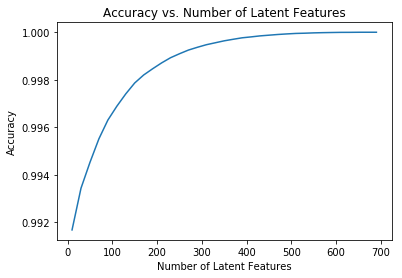

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df and user_item are already defined
# If not, ensure to create user_item using the provided data

def create_user_item_matrix(df):
    '''
    INPUT:
    df - pandas dataframe with article_id, title, user_id columns
    
    OUTPUT:
    user_item - user item matrix 
    
    Description:
    Return a matrix with user ids as rows and article ids on the columns with 1 values where a user interacted with 
    an article and a 0 otherwise
    '''
    # Create the pivot table
    user_item = df.drop_duplicates(subset=['user_id', 'article_id']).pivot(index='user_id', columns='article_id', values='title')
    
    # Fill the pivot table with 1s and replace NaNs with 0s
    user_item = user_item.notnull().astype(int)
    
    return user_item # return the user_item matrix 

# Create the user-item matrix
user_item = create_user_item_matrix(df)

# Convert user_item matrix to float
user_item = user_item.astype(float)

# Perform SVD using NumPy
u, s, vt = np.linalg.svd(user_item, full_matrices=False)

# Print the shapes of the resulting matrices
print(f"u shape: {u.shape}")
print(f"s shape: {s.shape}")
print(f"vt shape: {vt.shape}")

# Plot accuracy vs. number of latent features
num_latent_feats = np.arange(10, 700+10, 20)
sum_errs = []

for k in num_latent_feats:
    # Restructure with k latent features
    s_new, u_new, vt_new = np.diag(s[:k]), u[:, :k], vt[:k, :]
    
    # Take dot product
    user_item_est = np.around(np.dot(np.dot(u_new, s_new), vt_new))
    
    # Compute error for each prediction to actual value
    diffs = np.subtract(user_item.values, user_item_est)
    
    # Total errors and keep track of them
    err = np.sum(np.sum(np.abs(diffs)))
    sum_errs.append(err)

# Plotting the results
plt.plot(num_latent_feats, 1 - np.array(sum_errs) / user_item.size)
plt.xlabel('Number of Latent Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Latent Features')
plt.show()


In [49]:
df_train = df.head(40000)
df_test = df.tail(5993)

def create_test_and_train_user_item(df_train, df_test):
    '''
    INPUT:
    df_train - training dataframe
    df_test - test dataframe
    
    OUTPUT:
    user_item_train - a user-item matrix of the training dataframe 
                      (unique users for each row and unique articles for each column)
    user_item_test - a user-item matrix of the testing dataframe 
                    (unique users for each row and unique articles for each column)
    test_idx - all of the test user ids
    test_arts - all of the test article ids
    
    '''
    # Get unique users and articles from both datasets
    train_idx = df_train['user_id'].unique()
    train_arts = df_train['article_id'].unique()
    test_idx = df_test['user_id'].unique()
    test_arts = df_test['article_id'].unique()
    
    # Get all unique users and articles across both datasets
    all_users = np.unique(np.concatenate([train_idx, test_idx]))
    all_articles = np.unique(np.concatenate([train_arts, test_arts]))

    # Create empty matrices for training and test sets
    user_item_train = np.zeros((len(all_users), len(all_articles)))
    user_item_test = np.zeros((len(all_users), len(all_articles)))
    
    # Fill in the matrices based on interactions in the DataFrames
    for index, row in df_train.iterrows():
        user_idx = np.where(all_users == row['user_id'])[0][0]
        article_idx = np.where(all_articles == row['article_id'])[0][0]
        user_item_train[user_idx, article_idx] = 1  # Assuming binary interaction

    for index, row in df_test.iterrows():
        user_idx = np.where(all_users == row['user_id'])[0][0]
        article_idx = np.where(all_articles == row['article_id'])[0][0]
        user_item_test[user_idx, article_idx] = 1  # Assuming binary interaction
    
    return user_item_train, user_item_test, test_idx, test_arts

user_item_train, user_item_test, test_idx, test_arts = create_test_and_train_user_item(df_train, df_test)

In [50]:
# Replace the values in the dictionary below
a = 662 
b = 574 
c = 20 
d = 0 

sol_4_dict = {
    'How many users can we make predictions for in the test set?': c, # letter here, 
    'How many users in the test set are we not able to make predictions for because of the cold start problem?': a, # letter here, 
    'How many articles can we make predictions for in the test set?': b, # letter here,
    'How many articles in the test set are we not able to make predictions for because of the cold start problem?': d # letter here
}


t.sol_4_test(sol_4_dict)


Awesome job!  That's right!  All of the test articles are in the training data, but there are only 20 test users that were also in the training set.  All of the other users that are in the test set we have no data on.  Therefore, we cannot make predictions for these users using SVD.


`5.` Now use the **user_item_train** dataset from above to find U, S, and V transpose using SVD. Then find the subset of rows in the **user_item_test** dataset that you can predict using this matrix decomposition with different numbers of latent features to see how many features makes sense to keep based on the accuracy on the test data. This will require combining what was done in questions `2` - `4`.

Use the cells below to explore how well SVD works towards making predictions for recommendations on the test data.  

In [51]:
# Perform SVD on the user_item_train matrix
u_train, s_train, vt_train = perform_svd(user_item_train)


In [52]:
# Re-construct user_item_train matrix using SVD components
user_item_train_pred = np.dot(np.dot(u_train, np.diag(s_train)), vt_train)

In [53]:
# Compute MSE between the original and re-constructed matrix
mse_train = np.mean(np.square(user_item_train - user_item_train_pred))

In [54]:
print("M S E on training data:", mse_train)

M S E on training data: 8.44962953214e-32


In [55]:
# Perform and fit SVD on user_item_test matrix
u_test, s_test, vt_test =  perform_svd(user_item_test)


In [56]:
# Reconstruct the user_item_train matrix using the SVD components
user_item_test_pred = np.dot(np.dot(u_train, np.diag(s_train)), vt_test)

In [57]:
# Calculate Mean Squared Error between the original and reconstructed matrices
mse_test = np.mean(np.square(user_item_test - user_item_test_pred))

In [58]:
print("Mean Squared Error on test data:", mse_test)

Mean Squared Error on test data: 0.00915783639268


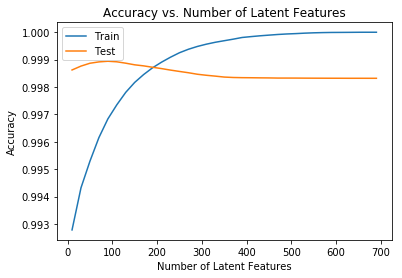

In [59]:
num_latent_feats = np.arange(10, 700+10, 20)
sum_errs_train = []
sum_errs_test = []
sum_errs_total = []

for k in num_latent_feats:
    # restructure with k latent features
    s_new, u_new, vt_new = np.diag(s_train[:k]), u_train[:, :k], vt_train[:k, :]
    
    # take dot product
    user_item_est = np.around(np.dot(np.dot(u_new, s_new), vt_new))
    
    # compute error for each prediction to actual value
    diffs_train = np.subtract(user_item_train, user_item_est)
    
    # total errors and keep track of them
    err_train = np.sum(np.sum(np.abs(diffs_train)))
    sum_errs_train.append(err_train)
    
    # Calculate test error
    user_item_test_est = np.around(np.dot(np.dot(u_test[:, :k], np.diag(s_train[:k])), vt_test[:k, :]))
    diffs_test = np.subtract(user_item_test, user_item_test_est)
    err_test = np.sum(np.sum(np.abs(diffs_test)))
    sum_errs_test.append(err_test)
    
    # Calculate total error
    total_error = err_train + err_test
    sum_errs_total.append(total_error)

# Plotting
plt.plot(num_latent_feats, 1 - np.array(sum_errs_train)/(user_item_train.shape[0]*user_item_train.shape[1]), label='Train')
plt.plot(num_latent_feats, 1 - np.array(sum_errs_test)/(user_item_test.shape[0]*user_item_test.shape[1]), label='Test')
#plt.plot(num_latent_feats, 1 - np.array(sum_errs_total)/((user_item_train.shape[0]*user_item_train.shape[1]) + (user_item_test.shape[0]*user_item_test.shape[1])), label='Total')
plt.xlabel('Number of Latent Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Latent Features')
plt.legend()
plt.show()

In [60]:
# Use these cells to see how well you can use the training 
# decomposition to predict on test data

`6.` Use the cell below to comment on the results you found in the previous question. Given the circumstances of your results, discuss what you might do to determine if the recommendations you make with any of the above recommendation systems are an improvement to how users currently find articles? 

**Your response here.** 

<a id='conclusions'></a>
### Extras
Using your workbook, you could now save your recommendations for each user, develop a class to make new predictions and update your results, and make a flask app to deploy your results.  These tasks are beyond what is required for this project.  However, from what you learned in the lessons, you certainly capable of taking these tasks on to improve upon your work here!


## Conclusion

> Congratulations!  You have reached the end of the Recommendations with IBM project! 

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2322/view). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations! 

In [61]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Recommendations_with_IBM.ipynb'])

0